# Daily Social Media Usage's Contributing Factors

In [1]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

In the modern day, most students resort to social media as a form of entertainment whenever they are bored. With apps such as TikTok and Instagram, it is very easy to spend hours on end browsing through social media. While many studies show data regarding the relationship between social media usage and emotional states, I have not come across many regarding what influences daily social media usage time. For this project, I will be observing how various factors can affect the amount of time a person spends on social media through a linear regression model.

The dataset I will be using for this project is regarding Social Media Usage and Emotional Well-Being.

Here is the link to the dataset: https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being?select=test.csv

The dataset contains 10 columns:
- User ID: an identifying number for each user in the dataset
- Age: the age of the user
- Gender: the gender identity of each user (male, female); NOTE: A third option for gender existed, however, it has been dropped for this project to only focus on males and females
- Platform: the main social media platform in use (Instagram, Twitter, Facebook, LinkedIn, Snapchat, Whatsapp, Telegram)
- Daily Usage Time (Minutes): total minutes spent per day on the platform
- Posts Per Day: number of posts created per day
- Likes Received Per Day: number of likes received on posts per day
- Comments Received Per Day: number of comments received on posts per day
- Messages Sent Per Day: number of messages sent per day
- Dominant Emotion: the most common emotional state of the user during the day (Happiness, Sadness, Anger, Anxiety, Boredom, Neutral)

As mentiond previously, I will be focusing on Daily Usage Time as my target variable (dependent variable).

## Data Cleaning

### Importing the Dataset

In [2]:
# Importing the CSV File
social_data = pd.read_csv("Social Media and Emotional State Dataset.csv")
social_data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,20,32,Female,Instagram,140,5,70,22,33,Happiness
1,174,29,Female,Whatsapp,90,2,24,12,22,Anger
2,211,23,Female,Twitter,75,4,45,20,25,Anxiety
3,261,29,Female,Snapchat,90,3,22,10,21,Sadness
4,304,28,Female,Instagram,200,8,110,40,45,Anxiety


In [3]:
# Converting the dataset into a dataframe
socialdf = pd.DataFrame(data=social_data)
socialdf.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,20,32,Female,Instagram,140,5,70,22,33,Happiness
1,174,29,Female,Whatsapp,90,2,24,12,22,Anger
2,211,23,Female,Twitter,75,4,45,20,25,Anxiety
3,261,29,Female,Snapchat,90,3,22,10,21,Sadness
4,304,28,Female,Instagram,200,8,110,40,45,Anxiety


In [4]:
# Displaying the shape of the dataset
socialdf.shape

(72, 10)

Shape of the Dataset: the dataset has 72 rows and 10 columns

### Cleaning the Data to Ensure There are No NA Values

In [5]:
# Drop the NA values
socialdf = socialdf.dropna()
socialdf

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,20,32,Female,Instagram,140,5,70,22,33,Happiness
1,174,29,Female,Whatsapp,90,2,24,12,22,Anger
2,211,23,Female,Twitter,75,4,45,20,25,Anxiety
3,261,29,Female,Snapchat,90,3,22,10,21,Sadness
4,304,28,Female,Instagram,200,8,110,40,45,Anxiety
...,...,...,...,...,...,...,...,...,...,...
67,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
68,926,31,Male,Facebook,80,2,20,10,20,Neutral
69,932,28,Male,Instagram,145,7,80,30,35,Happiness
70,962,23,Male,Whatsapp,70,3,22,10,18,Anger


### Transforming All Columns to the Correct Data Types

In [6]:
# Checking the data type for each column
socialdf.dtypes

User_ID                        int64
Age                            int64
Gender                        object
Platform                      object
Daily_Usage_Time (minutes)     int64
Posts_Per_Day                  int64
Likes_Received_Per_Day         int64
Comments_Received_Per_Day      int64
Messages_Sent_Per_Day          int64
Dominant_Emotion              object
dtype: object

In [7]:
# Must convert categorical columns to strings
## Create a dictionary to include all columns that need to be converted
categorical_dict = {'Gender': str,
                    'Platform': str,
                    'Dominant_Emotion': str
                   }
## Update the dataframe to convert the columns
socialdf = socialdf.astype(categorical_dict)
socialdf.dtypes

User_ID                        int64
Age                            int64
Gender                        object
Platform                      object
Daily_Usage_Time (minutes)     int64
Posts_Per_Day                  int64
Likes_Received_Per_Day         int64
Comments_Received_Per_Day      int64
Messages_Sent_Per_Day          int64
Dominant_Emotion              object
dtype: object

In [8]:
# Check to see if the elements have the right data type
socialdf[['Gender', 'Platform', 'Dominant_Emotion']].map(type)

,Gender,Platform,Dominant_Emotion
0,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'str'>,<class 'str'>
...,...,...,...
67,<class 'str'>,<class 'str'>,<class 'str'>
68,<class 'str'>,<class 'str'>,<class 'str'>
69,<class 'str'>,<class 'str'>,<class 'str'>
70,<class 'str'>,<class 'str'>,<class 'str'>


### Renaming the Daily Usage Time Column for Convenience

In [9]:
# Renaming the Daily Usage Time column for ease
socialdf.rename(columns = {'Daily_Usage_Time (minutes)':'Daily_Usage_Time'}, inplace = True)
socialdf

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,20,32,Female,Instagram,140,5,70,22,33,Happiness
1,174,29,Female,Whatsapp,90,2,24,12,22,Anger
2,211,23,Female,Twitter,75,4,45,20,25,Anxiety
3,261,29,Female,Snapchat,90,3,22,10,21,Sadness
4,304,28,Female,Instagram,200,8,110,40,45,Anxiety
...,...,...,...,...,...,...,...,...,...,...
67,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
68,926,31,Male,Facebook,80,2,20,10,20,Neutral
69,932,28,Male,Instagram,145,7,80,30,35,Happiness
70,962,23,Male,Whatsapp,70,3,22,10,18,Anger


## Exploratory Analysis

### Plotting a Histogram and Superimposing a Kernel Density Estimate Plot (kdeplot) of the Target Variabe Daily Usage Time


C:\Users\maana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


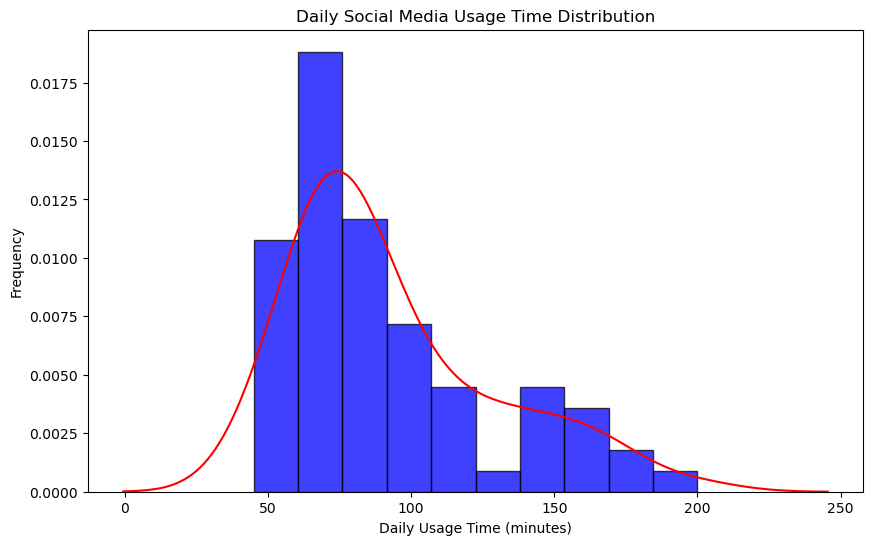

In [10]:
# Plotting a histogram, then superimposing a kde plot over it
plt.figure(figsize=(10,6))
    
socialdf['Daily_Usage_Time'].plot.hist(bins=10, alpha=0.75, color='blue', edgecolor='black', density=True)
sns.kdeplot(socialdf['Daily_Usage_Time'], color='red')

plt.title('Daily Social Media Usage Time Distribution')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Frequency')

plt.show()

According to the histogram and Kernel Density Estimate Plot (kdeplot), we can see that the target variable has a slightly skewed right distribution, and thus does not follow a normal distribution.

### Selecting Feature Variables

In [11]:
socialdf

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,20,32,Female,Instagram,140,5,70,22,33,Happiness
1,174,29,Female,Whatsapp,90,2,24,12,22,Anger
2,211,23,Female,Twitter,75,4,45,20,25,Anxiety
3,261,29,Female,Snapchat,90,3,22,10,21,Sadness
4,304,28,Female,Instagram,200,8,110,40,45,Anxiety
...,...,...,...,...,...,...,...,...,...,...
67,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
68,926,31,Male,Facebook,80,2,20,10,20,Neutral
69,932,28,Male,Instagram,145,7,80,30,35,Happiness
70,962,23,Male,Whatsapp,70,3,22,10,18,Anger


Out of the columns in the dataset these will be the ones I will utilize as feature variables to model the target variable Daily_Usage_Time:
- X1: Age
- X2: Gender
- X3: Posts_Per_Day
- X4: Likes_Received_Per_Day
- X5: Comments_Received_Per_Day
- X6: Messages_Sent_Per_Day

### Scatterplots of the Target Variable

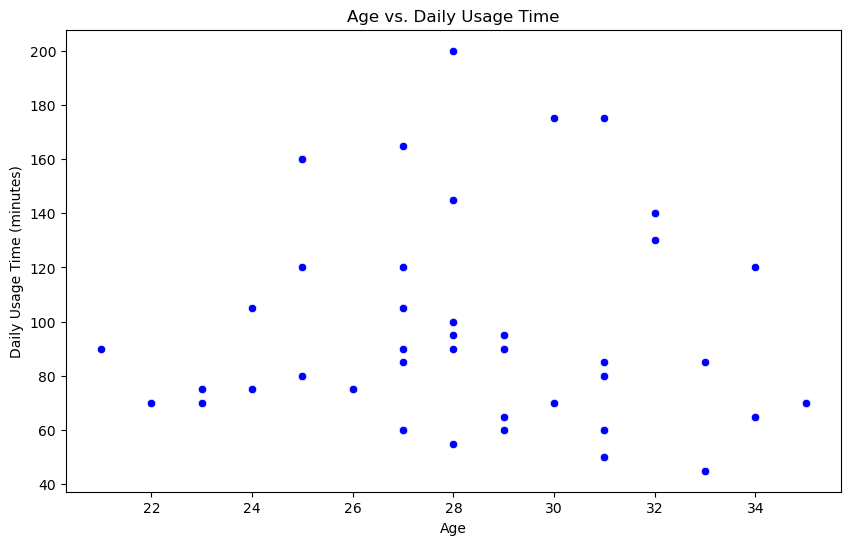

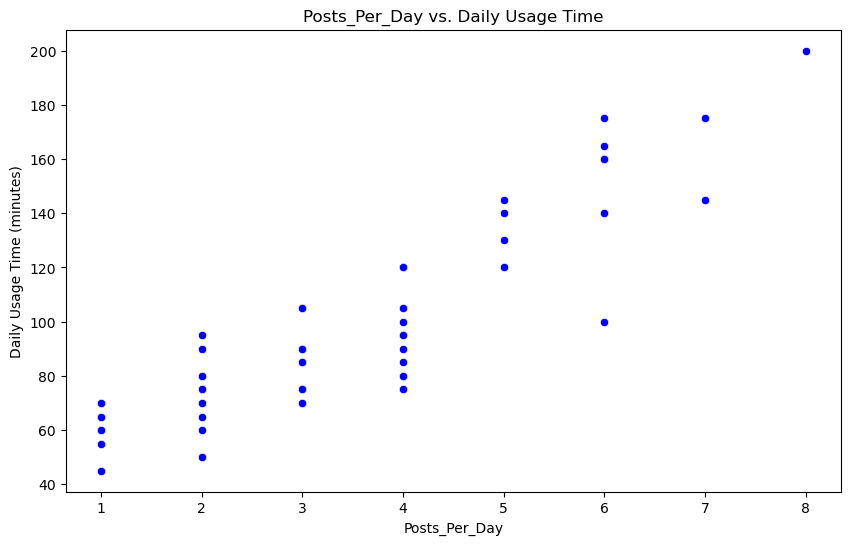

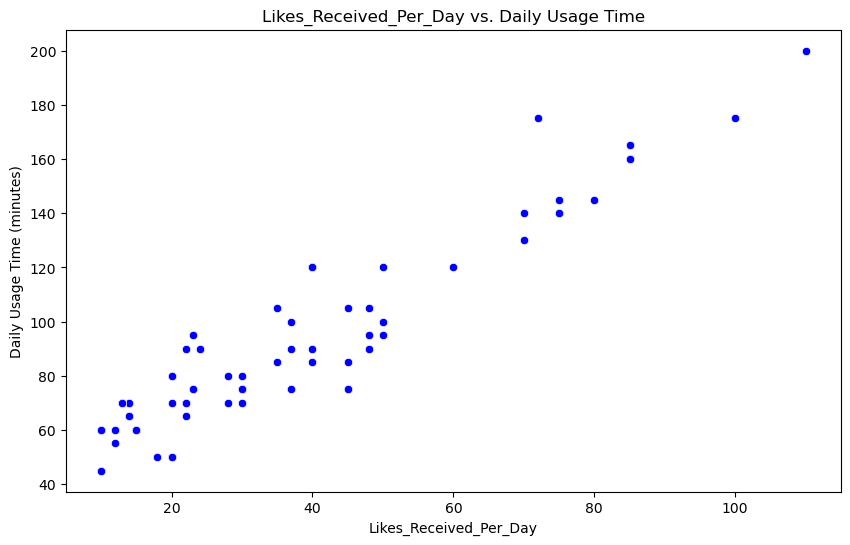

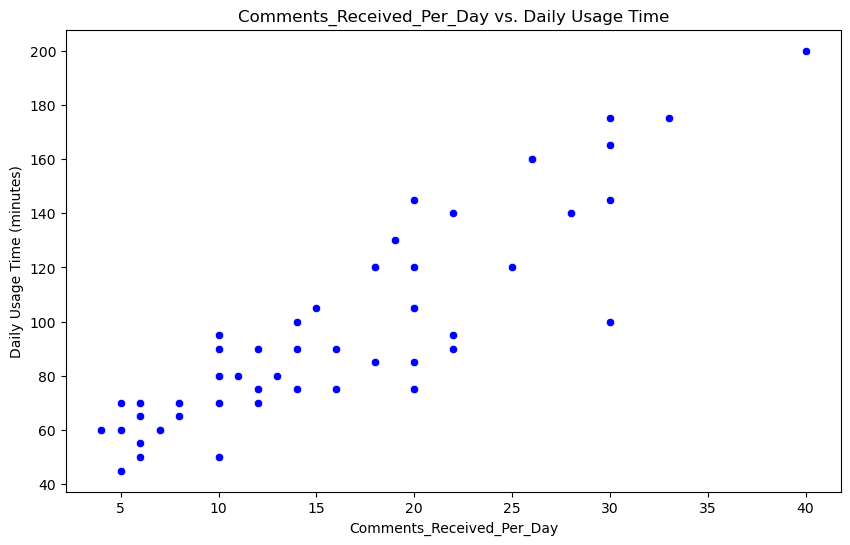

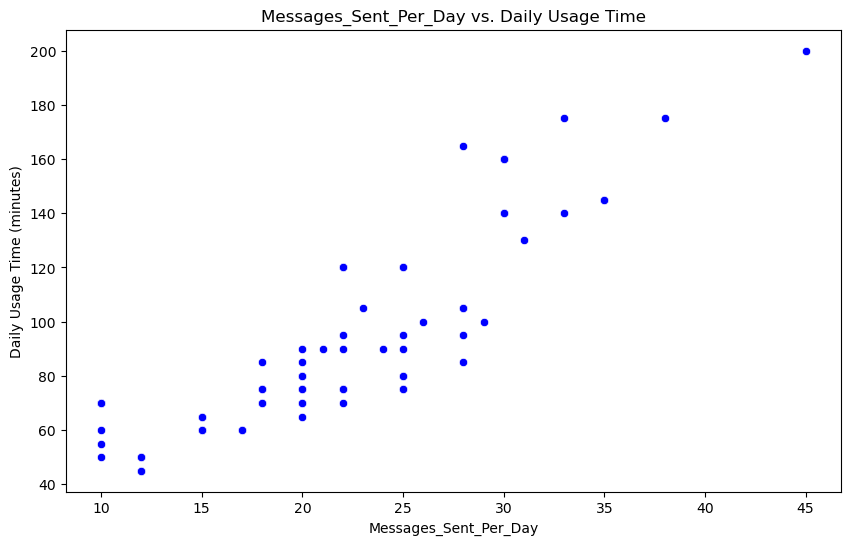

In [12]:
# Plotting scatter plots of the target variable y = Daily_Usage_Time against each feature of Xi
## Defining the x variables
x_numvariables = ['Age','Posts_Per_Day','Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day']

## For loop to plot the scatter plots
for variable in x_numvariables:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=socialdf, x=variable,y="Daily_Usage_Time", color="blue")
    plt.title(f'{variable} vs. Daily Usage Time')
    plt.xlabel(variable)
    plt.ylabel('Daily Usage Time (minutes)')
    plt.show()

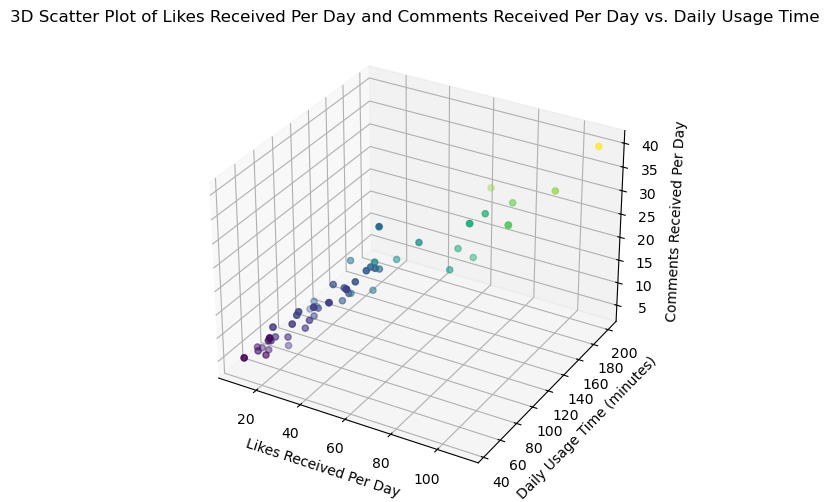

In [13]:
# Extra plot of the target variable y = Daily_Usage_Time against Likes_Received_Per_Day and
# Comments_Received_Per_Day

x = socialdf['Likes_Received_Per_Day']
y = socialdf['Daily_Usage_Time']
z = socialdf['Comments_Received_Per_Day']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x, y, z, c = y, cmap='viridis', marker='o')

ax.set_xlabel('Likes Received Per Day')
ax.set_ylabel('Daily Usage Time (minutes)')
ax.set_zlabel('Comments Received Per Day')
plt.title('3D Scatter Plot of Likes Received Per Day and Comments Received Per Day vs. Daily Usage Time')
plt.show()

### Boxplot of the Categorical Feature Variable

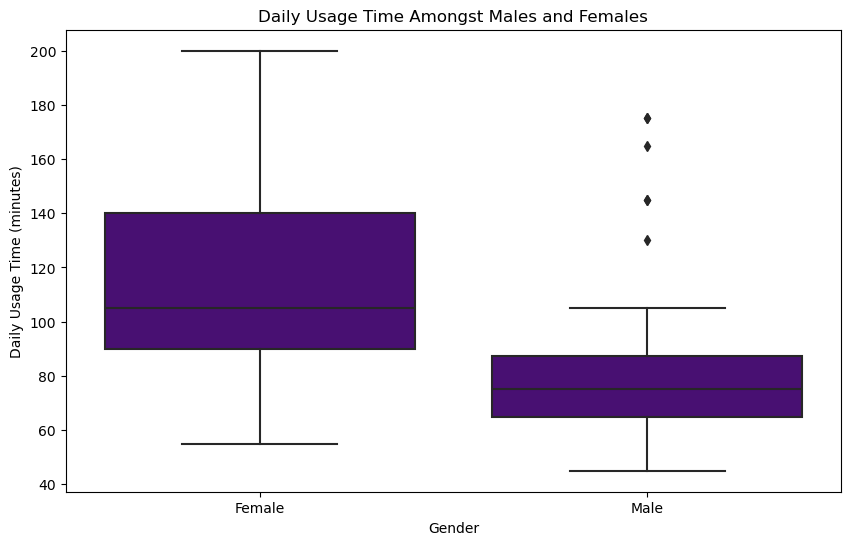

In [14]:
# Box plot of the target variable y = Daily_Usage_Time against the categorical variable x2 = Gender

plt.figure(figsize=(10,6))
sns.boxplot(data = socialdf, x='Gender', y='Daily_Usage_Time', color='indigo')

plt.title('Daily Usage Time Amongst Males and Females')
plt.xlabel('Gender')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()


Based on the differences in spread for Male and Female Daily Usage Time, using Gender as the categorical variable would be useful in modeling Daily Usage Time as being male or female seems to affect the amount of time spent on social media.

### Plots Demonstrating the Relationship Between the Feature Variables

C:\Users\maana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

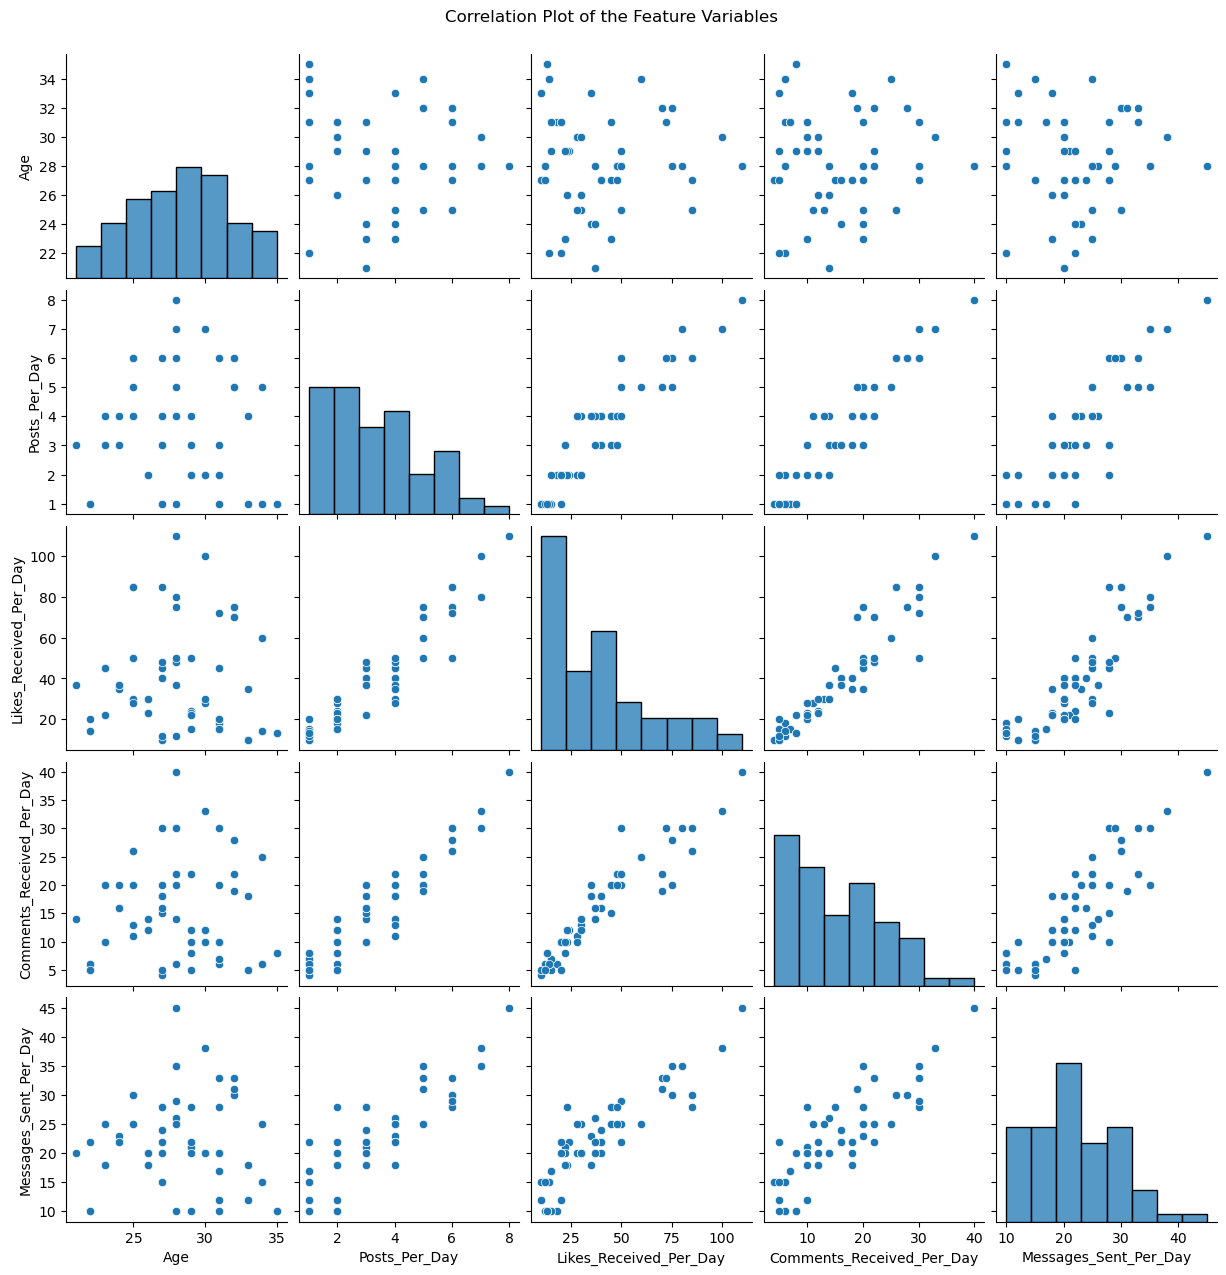

In [15]:
# Plotting the correlations between the X variables
x_variables = ['Age', 'Posts_Per_Day', 'Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day']  # Add more features here if needed

sns.pairplot(socialdf[x_variables])
plt.suptitle('Correlation Plot of the Feature Variables', y=1.02)
plt.show()

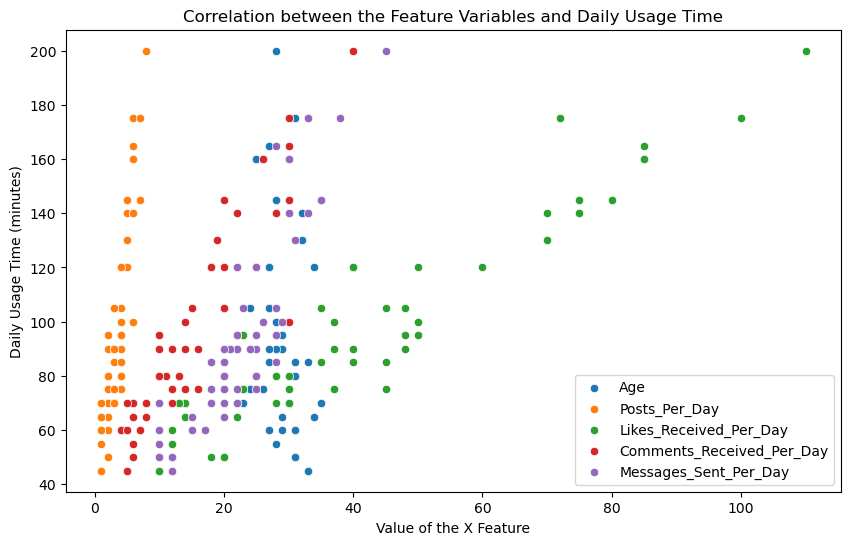

In [16]:
# Plotting the correlation between the features and the target variable
plt.figure(figsize = (10, 6))
for variable in x_variables: # x_variables was previously defined to include the 5 selected numeric variables
    sns.scatterplot(x = socialdf[variable], y = socialdf['Daily_Usage_Time'])
plt.title('Correlation between the Feature Variables and Daily Usage Time')
plt.xlabel('Value of the X Feature')
plt.ylabel('Daily Usage Time (minutes)')
plt.legend(x_variables)
plt.show()

## Modelling using Linear Regression

### Converting the Categorical Feature to Numeric

In [17]:
# Converting the categorical feature into numeric
socialdf

## Gender is the categorical feature
socialdf['Gender'].replace(['Female','Male'],[0,1], inplace = True)
socialdf

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,20,32,0,Instagram,140,5,70,22,33,Happiness
1,174,29,0,Whatsapp,90,2,24,12,22,Anger
2,211,23,0,Twitter,75,4,45,20,25,Anxiety
3,261,29,0,Snapchat,90,3,22,10,21,Sadness
4,304,28,0,Instagram,200,8,110,40,45,Anxiety
...,...,...,...,...,...,...,...,...,...,...
67,896,33,1,LinkedIn,85,4,35,18,18,Boredom
68,926,31,1,Facebook,80,2,20,10,20,Neutral
69,932,28,1,Instagram,145,7,80,30,35,Happiness
70,962,23,1,Whatsapp,70,3,22,10,18,Anger


### Create X Variable to Hold Feature Matrix and y Variable to Hold Target Variable

In [18]:
# Create variables X and y to hold feature matrix and target variable
X = socialdf[['Age','Gender','Posts_Per_Day','Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day']]
y = socialdf[['Daily_Usage_Time']]

In [19]:
# Checking to see if variable X is properly storing values
X

,Age,Gender,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,32,0,5,70,22,33
1,29,0,2,24,12,22
2,23,0,4,45,20,25
3,29,0,3,22,10,21
4,28,0,8,110,40,45
...,...,...,...,...,...,...
67,33,1,4,35,18,18
68,31,1,2,20,10,20
69,28,1,7,80,30,35
70,23,1,3,22,10,18


In [20]:
# Checking to see if variable y is properly storing values
y

,Daily_Usage_Time
0,140
1,90
2,75
3,90
4,200
...,...
67,85
68,80
69,145
70,70


### Adding a Vector of 1's to Feature Matrix

In [21]:
# Using the statsmodels package to add a vector of 1's
## Importing the statsmodels package
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Adding the column of 1's
X = sm.add_constant(X)
X

,const,Age,Gender,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,1.0,32,0,5,70,22,33
1,1.0,29,0,2,24,12,22
2,1.0,23,0,4,45,20,25
3,1.0,29,0,3,22,10,21
4,1.0,28,0,8,110,40,45
...,...,...,...,...,...,...,...
67,1.0,33,1,4,35,18,18
68,1.0,31,1,2,20,10,20
69,1.0,28,1,7,80,30,35
70,1.0,23,1,3,22,10,18


### Creating Linear Regression Model

In [22]:
# Creating the linear regression model using statsmodels
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Daily_Usage_Time   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     97.99
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.29e-30
Time:                        00:12:18   Log-Likelihood:                -276.05
No. Observations:                  72   AIC:                             566.1
Df Residuals:                      65   BIC:                             582.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        20.8654     13.533      1.542      0.128      -6.161      47.892
Age                           0.7507      0.424      1.769      0.082      -0.097       1.598
Gender                       -9.2270      3.255     -2.835      0.006     -15.727      -2.727
Posts_Per_Day                 2.6525      2.762      0.960      0.340      -2.863       8.168
Likes_Received_Per_Day        1.1577      0.210      5.520      0.000       0.739       1.577
Comments_Received_Per_Day    -0.7291      0.604     -1.206      0.232      -1.936       0.478
Messages_Sent_Per_Day         0.7289      0.426      1.713      0.092      -0.121       1.579
==============================================================================
Omnibus:                        4.874   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                5.682
Skew:                           0.211   Prob(JB):                       0.0584
Kurtosis:                       4.310   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R Squared Values
The R squared value is 0.900, and the adjusted R squared value is 0.891

### Linear Regression Equation
yi = β0 + β1x1,i +β2x2,i + β3x3,i + β4x4,i + β5x5,i + β6x6,i

### Interpreting the β Coefficients
- β0 (constant): 20.8654; The average total daily social media usage time for users with a value of 0 for all features is 20.8654 minutes
- β1 (Age): 0.7507; The average total daily social media usage time for users is expected to increase by 0.7507 minutes for each additional year old
- β2 (Gender): -9.2270; The average total daily social media usage time for users is expected to decrease by -9.2270 minutes if the user is male. For a female user, the average total daily social media usage time has no change
- β3 (Posts_Per_Day): 2.6525; The average total daily social media usage time for users is expected to increase by 2.6525 minutes for each additional post per day
- β4 (Likes_Received_Per_Day): 1.1577; The average total daily social media usage time for users is expected to increase by 1.1577 minutes for each additional like received per day
- β5 (Comments_Received_Per_Day): -0.7291; The average total daily social media usage time for users is expected to decrease by -0.7291 minutes for each additional comment received per day
- β6 (Messages_Sent_Per_Day): 0.7289; The average total daily social media usage time for users is expected to increase by 0.7289 minutes for each additional message sent per day

Linear regression model: Daily Usage Time = 20.8654 + 0.7507x1 - 9.2270x2 + 2.6526x3 + 1.1577x4 - 0.7291x5 + 0.7289x6

### Is this a Good Model?

With an adjusted R squared value of 0.891 or 89.1%, we can state that the regression relationship is strong. The dataset contains 89.1% variability in total daily social media usage time, meaning a high correlation can be found between the features Age, Gender, Posts_Per_Day, Likes_Received_Per_Day, Comments_Received_Per_Day, Messages_Sent_Per_Day and the target variable Daily_Usage_Time. The same conclusion can be drawn when using the R squared value of 0.900 or 90%, which states that the dataset contains 90% variability in the total daily social media usage time and suggests a high correlation between the features.

Looking at these values collectively, this is a good model as there is a strong correlation between the values and the adjusted r squared and r squared values explain a lot of the variability. In addition, the regression coefficients provide great detail as well in the form of the regression model. However, to determine if it is truly a good model, we have to test the assumptions first. 

## Checking Assumptions

### Are the Residuals Normally Distributed?

C:\Users\maana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

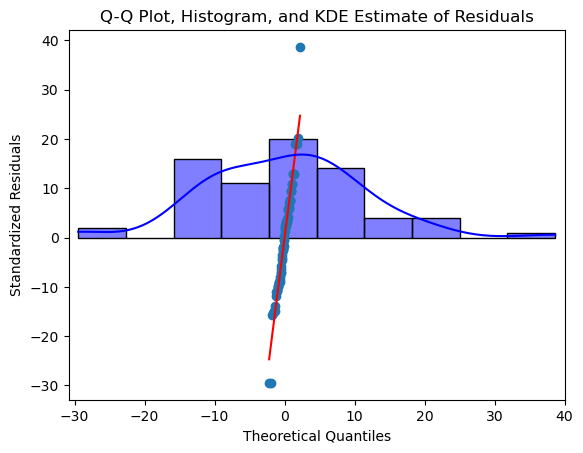

In [23]:
# Testing if residuals are normally distributed
## Getting the residuals
residuals = results.resid
residuals

## Plotting residuals on a Q-Q plot and Histogram with KDE
plt.figure(figsize = (10, 6))

sm.qqplot(residuals, line = 's')
sns.histplot(residuals, kde = True, bins = 10, color = 'blue', alpha = 0.5)

plt.title('Q-Q Plot, Histogram, and KDE Estimate of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()


We can assume the residuals are normally distributed as we can see the KDE estimate around the histogram resembling a normal distribution bell curve. In addition, because all the points approximately fall on the line, we can assume the residuals are normally distributed.

In [24]:
# Checking for the Jarque-Bera p-value
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Daily_Usage_Time   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     97.99
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.29e-30
Time:                        00:12:18   Log-Likelihood:                -276.05
No. Observations:                  72   AIC:                             566.1
Df Residuals:                      65   BIC:                             582.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        20.8654     13.533      1.542      0.128      -6.161      47.892
Age                           0.7507      0.424      1.769      0.082      -0.097       1.598
Gender                       -9.2270      3.255     -2.835      0.006     -15.727      -2.727
Posts_Per_Day                 2.6525      2.762      0.960      0.340      -2.863       8.168
Likes_Received_Per_Day        1.1577      0.210      5.520      0.000       0.739       1.577
Comments_Received_Per_Day    -0.7291      0.604     -1.206      0.232      -1.936       0.478
Messages_Sent_Per_Day         0.7289      0.426      1.713      0.092      -0.121       1.579
==============================================================================
Omnibus:                        4.874   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                5.682
Skew:                           0.211   Prob(JB):                       0.0584
Kurtosis:                       4.310   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for the Jarque-Bera test is 0.0584, and our alpha value is 0.05. Because the p-value (0.0584) is not less than or equal to the alpha value (0.05), we fail to reject the null hypothesis that the residuals are normally distributed. 

Specificially to this example, if the errors u are not normal, then our F-test and T-test will fall apart. This is because the assumption that the residuals are normally distributed has to be proven true for the model to be significant. If the assumption is not proven true, then the significance of the F-Test and T-Test will no longer be there, and the model would not be significant.

### Are the Residuals Correlated?

In [25]:
# Checking for the Durbin-Watson Statistic
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Daily_Usage_Time   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     97.99
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.29e-30
Time:                        00:12:18   Log-Likelihood:                -276.05
No. Observations:                  72   AIC:                             566.1
Df Residuals:                      65   BIC:                             582.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        20.8654     13.533      1.542      0.128      -6.161      47.892
Age                           0.7507      0.424      1.769      0.082      -0.097       1.598
Gender                       -9.2270      3.255     -2.835      0.006     -15.727      -2.727
Posts_Per_Day                 2.6525      2.762      0.960      0.340      -2.863       8.168
Likes_Received_Per_Day        1.1577      0.210      5.520      0.000       0.739       1.577
Comments_Received_Per_Day    -0.7291      0.604     -1.206      0.232      -1.936       0.478
Messages_Sent_Per_Day         0.7289      0.426      1.713      0.092      -0.121       1.579
==============================================================================
Omnibus:                        4.874   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                5.682
Skew:                           0.211   Prob(JB):                       0.0584
Kurtosis:                       4.310   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Durbin-Watson Statistic has a value of 1.955. Because this falls between 1.5 to 2.5, this indicates there is no significant correlation, meaning the residuals are independent from one another. If the independence of residuals was not proven, the regression model would be inaccurate as the Ordinary Least Squares (OLS) Regression method relies on the errors being independent. This would cause inconsistent and biased regression coefficient estimates. In addition, the T-test and F-test would not be significant as it relies on the assumption that the residuals are independent.

### Is Homoscedasticity Present?

In [26]:
# Testing for Homoscedasticity by plotting the residuals on the y-axis against the fitted values
## Residuals was previously defined
residuals

## Storing the fitted values
fitted_values = results.fittedvalues
fitted_values

0     147.201792
1      83.011378
2     104.477958
3      84.077759
4     194.087691
         ...    
67     87.536562
68     70.655308
69    147.479234
70     68.160041
71     84.817202
Length: 72, dtype: float64

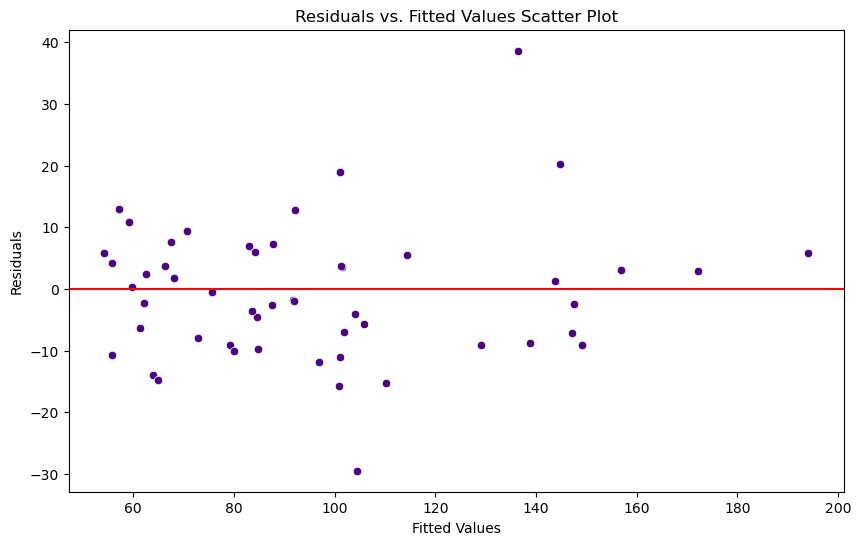

In [27]:
## Plotting the residuals vs fitted values scatter plot
plt.figure(figsize = (10, 6))
sns.scatterplot(x = fitted_values, y = residuals, color = 'indigo')

plt.title('Residuals vs. Fitted Values Scatter Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'red')
plt.show()

After observing the scatter plot, there does not appear to be any sort of pattern between the data. In relation to the line drawn at y = 0, the residuals appear to have a constant variance as they are mostly spread across the range of the fitted values. This suggests homeoscedasticity. When the assumption of homeoscedasticity cannot be proven, the regression model falls apart as the Ordinary Least Squares (OLS) method will display higher values for the variance and standard errors. The T-test and F-test also fall apart as the model is no longer significant because we cannot assume homeoscedasticity.

### Is Multicollinearity Present?

In [28]:
# Calculate the variance inflation factors using the statsmodels package
from statsmodels.stats.outliers_influence import variance_inflation_factor 

var_inf_factors = pd.DataFrame(index=(X.columns))
var_inf_factors["Variance Inflation Factors"] = [variance_inflation_factor(X.values, i)
                                                for i in range(len(X.columns))]
var_inf_factors

,Variance Inflation Factors
const,95.042768
Age,1.147355
Gender,1.246140
Posts_Per_Day,13.194403
Likes_Received_Per_Day,13.741877
Comments_Received_Per_Day,13.017209
Messages_Sent_Per_Day,5.289325


Posts Per Day, Likes Received Per Day, and Comments Received Per day all have high variance inflation factors, suggesting that there could possibly be multicollinearity among these features. When multicollinearity is present, the T-tests lose their significance as the assumption that multicollinearity does not exist is necessary for its accuracy. This causes the standard errors to become inflated, leading to higher T-statistic values. Because of the inflated standard errors, the p-value will also be inaccurate, further making the model not significant. 